In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from scipy.optimize import fmin_bfgs
from scipy.optimize import fmin

from scipy.io import loadmat #To Read .mat files
import matplotlib.image as mpimg # 

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0,6.0)
print("Setup Complete")

Setup Complete


# Multiclass Classification Exercise

In [18]:
X = loadmat("data/ex3data1.mat")['X']
y = loadmat("data/ex3data1.mat")['y']
Weights = loadmat("data/ex3weights.mat")
Theta1 = Weights["Theta1"]
Theta2 = Weights["Theta2"]
y.shape

(5000, 1)

In [19]:
X.shape, y.shape,Theta1.shape, Theta2.shape

((5000, 400), (5000, 1), (25, 401), (10, 26))

In [20]:
numSamples = X.shape[0] #m
numFeatures = X.shape[1] #n
numNodes=Theta1.shape[0]
num_labels=Theta2.shape[0]
all_theta = np.zeros((num_labels, numFeatures+1))
Xin = np.hstack((np.ones((numSamples,1)),X))
Xin.shape
y=np.where(y==10,0,y)

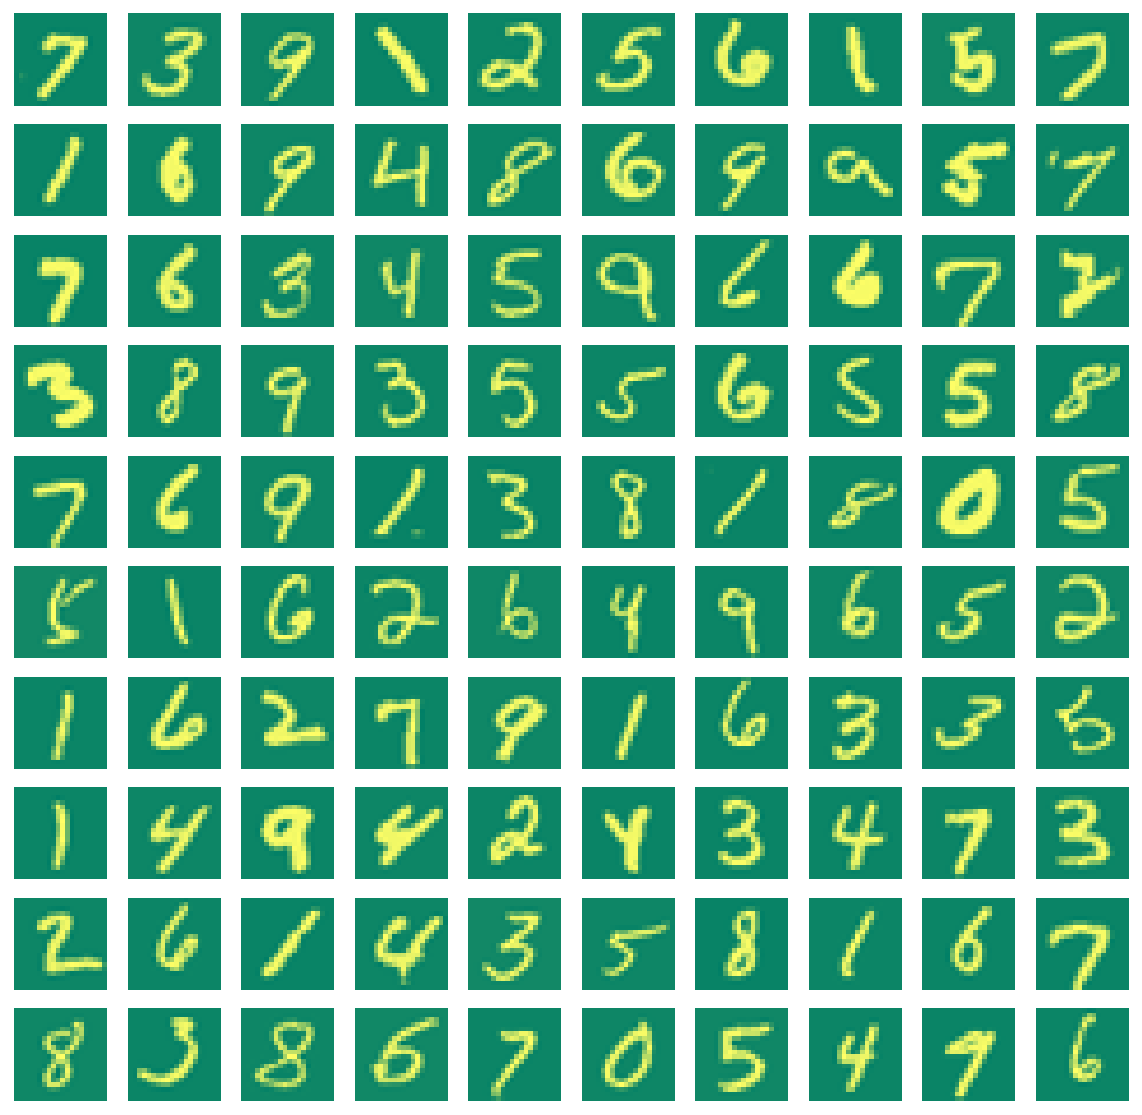

In [21]:
pick_100 = set()
for i in range(200):
    pick_100.add(np.random.randint(0,numSamples+1))
fig,axes = plt.subplots(10,10,figsize=(10,10))
for i in range(0,10):
    for j in range(0,10):
        axes[i,j].imshow(X[pick_100.pop()].reshape(20,20,order="F"),cmap='summer')
        axes[i,j].set_axis_off()
plt.show()

In [22]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def RegCstFun(theta,m,x,y,lamb):
    h = sigmoid(x @ theta)# Following the formula here
    J = 1/m*(-np.dot(np.transpose(y),np.log(h))-np.dot(np.transpose(1-y),np.log(1-h))) + lamb/2/m*np.sum(theta**2) #MOVED y TO 2ND!!
    return J.item() #return the value only

In [305]:
def oneVsAll(X,y,labels,lamb,m):
    theta = np.zeros((len(X[1]),labels))
    for i in range (0,labels):#labels
        theta0 = np.zeros((len(X[1]),1))
        y_i = np.where(y==i,1,0) #Assigning the correct value 1, and all other values 0 for oneVsAll.
        trained = fmin_bfgs(RegCstFun,theta0,args=(m,X,y_i,lamb))
        theta[:,i] = trained
    return theta
all_theta = oneVsAll(Xin,y,num_labels,0.1,numSamples)

#This takes a loooooong time.

Optimization terminated successfully.
         Current function value: 0.009087
         Iterations: 287
         Function evaluations: 116064
         Gradient evaluations: 288
Optimization terminated successfully.
         Current function value: 0.013210
         Iterations: 286
         Function evaluations: 115661
         Gradient evaluations: 287
Optimization terminated successfully.
         Current function value: 0.050944
         Iterations: 439
         Function evaluations: 177320
         Gradient evaluations: 440
Optimization terminated successfully.
         Current function value: 0.057922
         Iterations: 448
         Function evaluations: 180947
         Gradient evaluations: 449
Optimization terminated successfully.
         Current function value: 0.033121
         Iterations: 397
         Function evaluations: 160394
         Gradient evaluations: 398
Optimization terminated successfully.
         Current function value: 0.054468
         Iterations: 433
     

In [307]:
all_theta.shape

(401, 10)

In [37]:
def perdictOneVsAll(theta,x):
    pred = np.dot(x,theta)
    return np.argmax(pred,axis=1) #argmax return the index of the largest value.

def Performance(pred,y):
    percent = np.sum(pred[:,np.newaxis]==y)/y.size #np.newaxis here has the same function as reshape
    return str(percent*100)+"% Accuracy"


In [400]:
Performance(perdictOneVsAll(all_theta,Xin),y)

'96.5% Accuracy'

[[3. 2. 3. 7. 5. 9. 7. 5. 6. 7.]
 [8. 4. 0. 3. 9. 3. 5. 2. 6. 6.]
 [4. 4. 8. 7. 5. 7. 4. 9. 7. 0.]
 [6. 0. 5. 6. 7. 7. 4. 1. 7. 9.]
 [7. 4. 7. 6. 9. 0. 3. 4. 0. 1.]
 [0. 1. 6. 5. 5. 7. 6. 1. 5. 7.]
 [6. 2. 2. 1. 7. 8. 5. 4. 1. 4.]
 [5. 3. 6. 0. 8. 6. 1. 8. 4. 2.]
 [0. 3. 9. 5. 6. 7. 7. 4. 4. 4.]
 [3. 7. 1. 9. 9. 7. 1. 5. 2. 7.]]


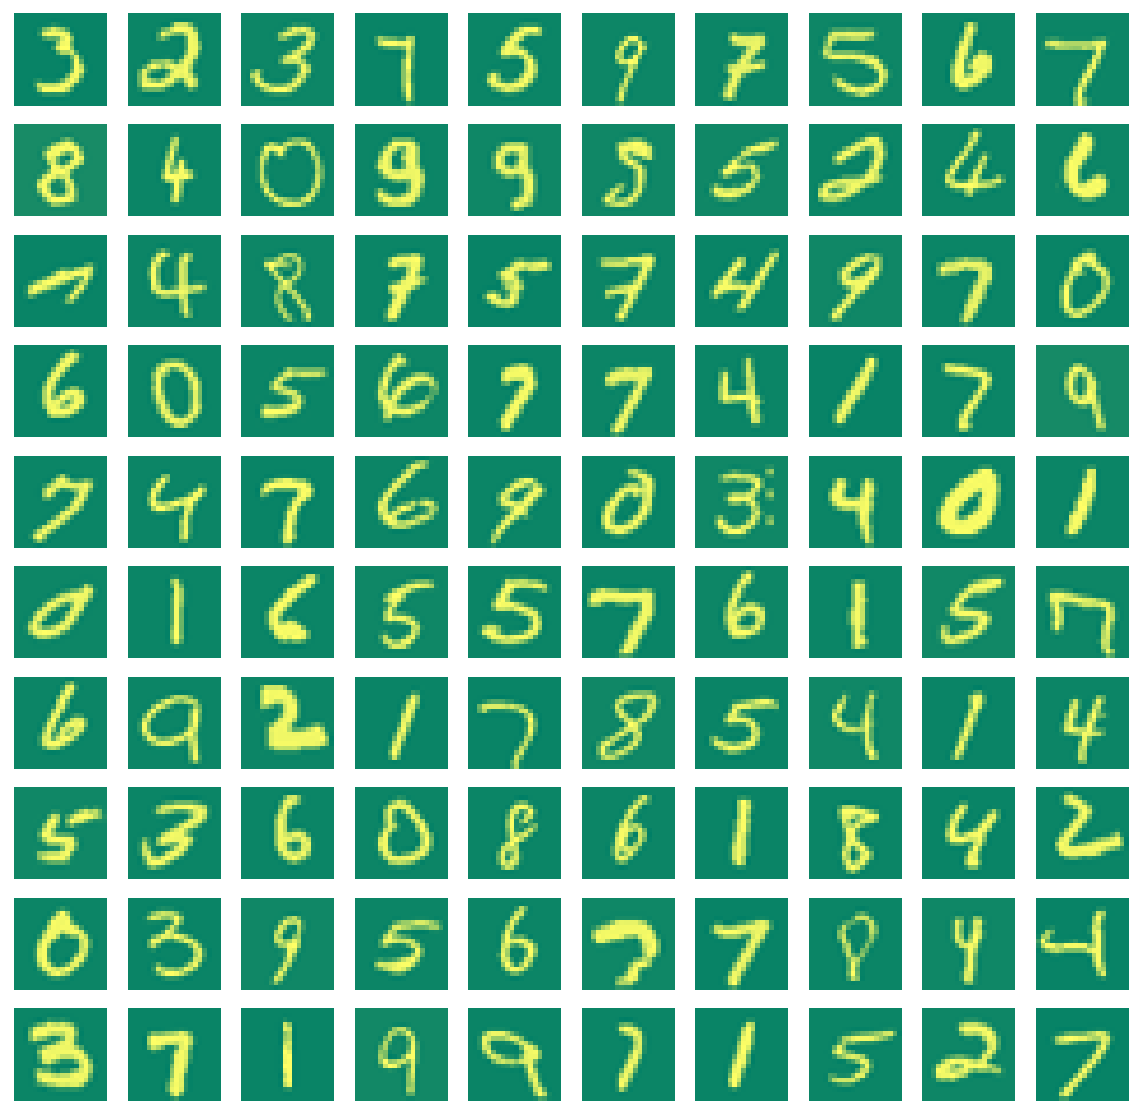

In [417]:
#Pick again a 100 random images, and compare the numbers perdicted by the classifier vs. the actual pictures.
pick_100 = set()
for i in range(200):
    pick_100.add(np.random.randint(0,numSamples+1))
fig,axes = plt.subplots(10,10,figsize=(10,10))
predRst = np.zeros((10,10))
for i in range(0,10):
    for j in range(0,10):
        img = X[pick_100.pop()]
        x_pred = np.vstack((np.ones((1,1)),img.reshape(-1,1)))
        predRst[i,j]=perdictOneVsAll(all_theta,np.transpose(x_pred))
        axes[i,j].imshow(img.reshape(20,20,order="F"),cmap='summer')
        axes[i,j].set_axis_off()
print(predRst)
plt.show()


# Neural Network Exercise

In [10]:
Theta1.shape,Theta2.shape

((25, 401), (10, 26))

In [117]:
def perdictNN(theta1,theta2,x): #calculate the output from hidden layer first, then use theta2 to output to the output layer.
    middle = sigmoid(x@theta1)
    middle_in = np.hstack((np.ones((len(x),1)),middle))
    output = sigmoid(middle_in@theta2)
    return np.argmax(output,axis=1)+1 #argmax return the index of the largest value. +1 because 0->10 in original data

def PerformanceNN(pred,y):
    percent = np.sum(pred[:,np.newaxis]==y)/y.size #np.newaxis here has the same function as reshape
    return str(percent*100)+"% Accuracy"

In [118]:
outputNN = perdictNN(np.transpose(Theta1),np.transpose(Theta2),Xin)
yin = np.where(y==0,10,y) #y data is from 0 to 9, instead of 1 to 10.
PerformanceNN(outputNN,yin)

'97.52% Accuracy'

# Use NN to identify 100 randomly picked images!

[[ 5.  3.  5.  4.  1.  2.  2.  4.  1.  3.]
 [ 3. 10.  3.  9.  2.  4. 10.  5. 10.  6.]
 [ 3.  4.  7.  1.  7.  1.  5.  8.  2.  4.]
 [ 3.  5.  9.  8.  8.  9.  2.  9.  5.  1.]
 [ 1.  4.  8.  9.  1.  5.  3.  3.  4.  3.]
 [ 4.  6.  5.  5.  1.  6.  9. 10.  4.  3.]
 [ 5.  3.  5.  2.  2.  7.  2. 10.  9.  2.]
 [ 7.  4.  5.  2.  8.  1.  9.  6.  1. 10.]
 [ 2.  2.  9.  4.  1.  9.  8.  2.  1.  4.]
 [ 8.  8.  8.  3.  7.  5.  5.  5.  5.  1.]]


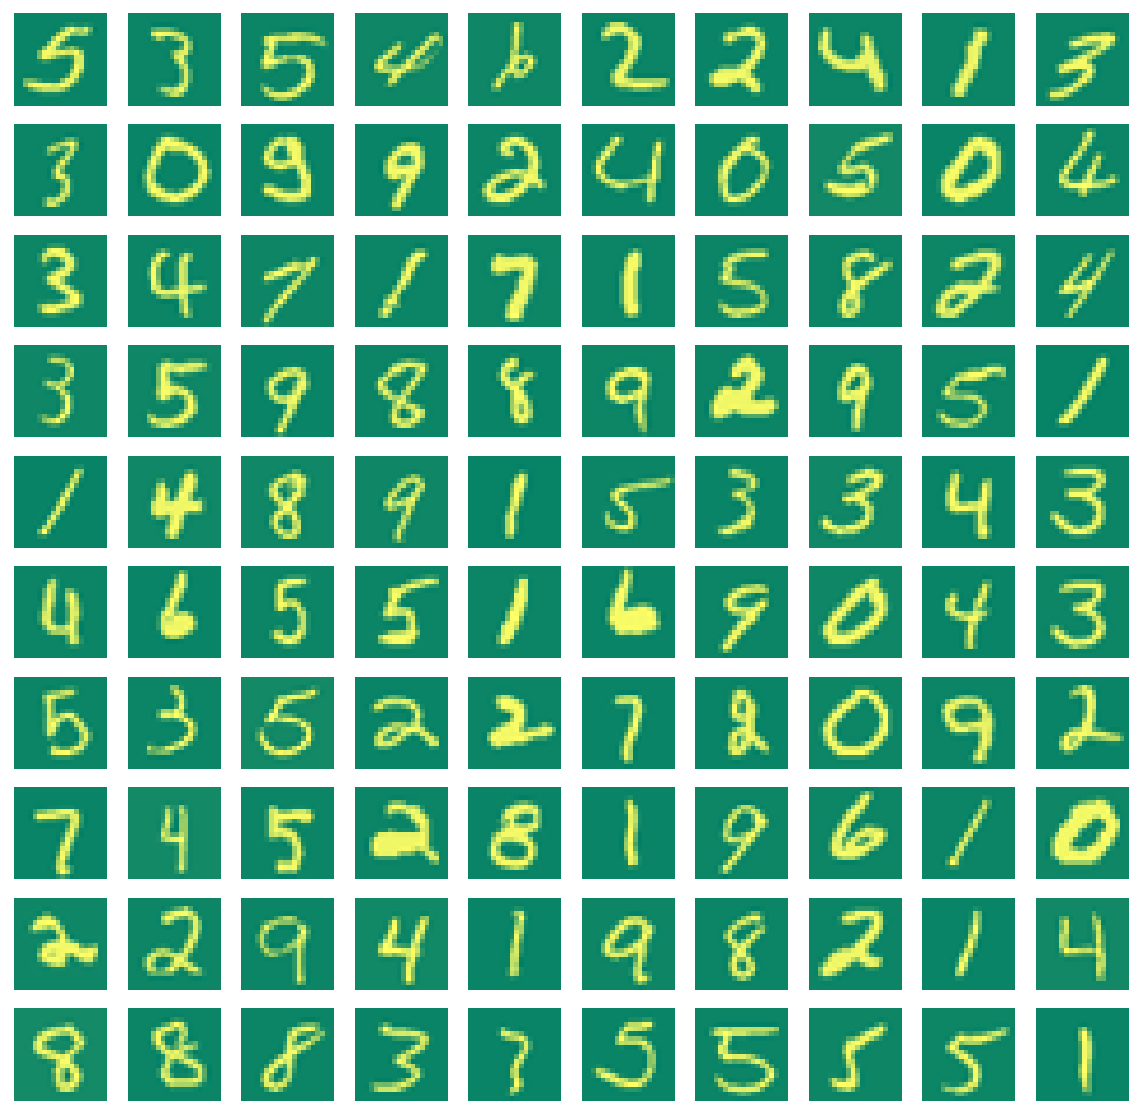

In [120]:
pick_100 = set()
for i in range(200):
    pick_100.add(np.random.randint(0,numSamples+1))
fig,axes = plt.subplots(10,10,figsize=(10,10))
predNN = np.zeros((10,10))
for i in range(0,10):
    for j in range(0,10):
        img = X[pick_100.pop()]
        x_predNN = np.vstack((np.ones((1,1)),img.reshape(-1,1))) #Same as linear classfier
        predNN[i,j]=perdictNN(np.transpose(Theta1),np.transpose(Theta2),np.transpose(x_predNN))
        axes[i,j].imshow(img.reshape(20,20,order="F"),cmap='summer')
        axes[i,j].set_axis_off()
print(predNN) #NN perdicted results. 10->0.
plt.show() #Actual images